In [54]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
def tan_derivative_approx(x, h):
    numerator = math.tan(x + h) - math.tan(x)
    return numerator / h

In [56]:
def true_tan_derivative(x):
    return 1 + math.tan(x) ** 2

In [57]:
def truncation_error(true_value, approx_value):
    return abs(true_value - approx_value)

In [58]:
def numerical_error(true_value, approx_value):
    return abs(true_value - approx_value) / abs(true_value)

In [59]:
def computational_error(true_value, approx_value, h):
    return (abs(true_value - approx_value)) / h

In [60]:
x = 1
k_values = range(17)
h_values = [10 ** (-k) for k in k_values]

In [61]:
truncation_errors = []
numerical_errors = []
computational_errors = []

for h in h_values:
    approx_derivative = tan_derivative_approx(x, h)
    true_derivative = true_tan_derivative(x)
    
    truncation_errors.append(truncation_error(true_derivative, approx_derivative))
    numerical_errors.append(numerical_error(true_derivative, approx_derivative))
    computational_errors.append(computational_error(true_derivative, approx_derivative, h))

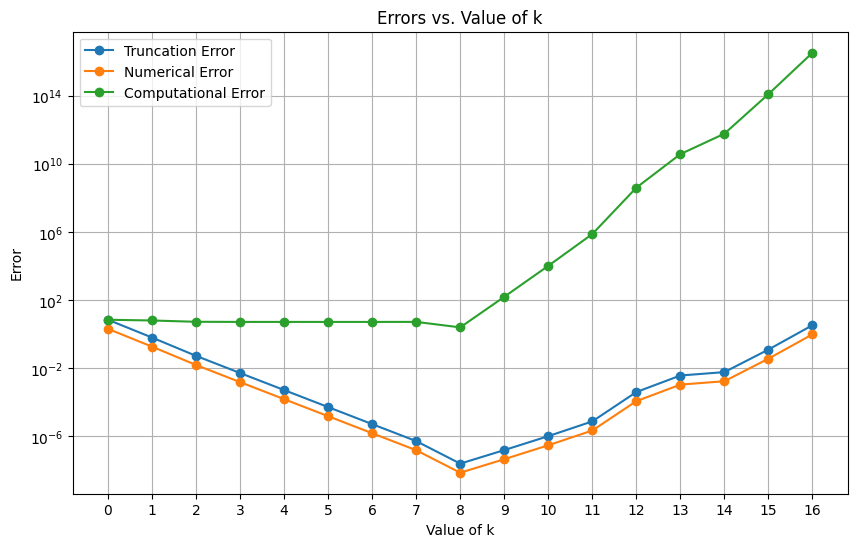

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, truncation_errors, label='Truncation Error', marker='o')
plt.plot(k_values, numerical_errors, label='Numerical Error', marker='o')
plt.plot(k_values, computational_errors, label='Computational Error', marker='o')

plt.yscale('log')
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.title('Errors vs. Value of k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [63]:
df = pd.DataFrame()
df["h_values"] = h_values
df["absolute_errors"] = absolute_errors
df["numerical_errors"] = numerical_errors
df["computational_errors"] = computational_errors
df = df.rename_axis("k", axis="columns")
df

k,h_values,absolute_errors,numerical_errors,computational_errors
0,1.000000e+00,7.167966e+00,2.092520e+00,7.167966e+00
1,1.000000e-01,6.480005e-01,1.891686e-01,6.480005e+00
2,1.000000e-02,5.431114e-02,1.585486e-02,5.431114e+00
3,1.000000e-03,5.344396e-03,1.560171e-03,5.344396e+00
4,1.000000e-04,5.335875e-04,1.557684e-04,5.335875e+00
5,1.000000e-05,5.335026e-05,1.557436e-05,5.335026e+00
6,1.000000e-06,5.334850e-06,1.557384e-06,5.334850e+00
7,1.000000e-07,5.362439e-07,1.565439e-07,5.362439e+00
8,1.000000e-08,2.554135e-08,7.456200e-09,2.554135e+00
9,1.000000e-09,1.587681e-07,4.634863e-08,1.587681e+02


In [64]:
def second_derivative_tan(x):
    return 2 * math.tan(x) * (1 + math.tan(x) ** 2)

In [65]:
macheps = 2**-52
M = abs(second_derivative_tan(x))
h_min_formula = 2 * math.sqrt(macheps / M)

In [66]:
computational_errors_min = min(computational_errors)
index_min = computational_errors.index(computational_errors_min)
h_min_graph = h_values[index_min]

print("Wartość h_min obliczona ze wzoru:", h_min_formula)
print("Wartość h_min odczytana z wykresu:", h_min_graph)

Wartość h_min obliczona ze wzoru: 9.123695225180455e-09
Wartość h_min odczytana z wykresu: 1e-08


In [67]:
def tan_derivative_approx_2(x, h):
    numerator = math.tan(x + h) - math.tan(x - h)
    return numerator / (2 * h)

In [68]:
truncation_errors_2 = []
numerical_errors_2 = []
computational_errors_2 = []
h_values = [10 ** (-k) for k in k_values]

for h in h_values:
    approx_derivative = tan_derivative_approx_2(x, h)
    true_derivative = true_tan_derivative(x)
    
    truncation_errors_2.append(truncation_error(true_derivative, approx_derivative))
    numerical_errors_2.append(numerical_error(true_derivative, approx_derivative))
    computational_errors_2.append(computational_error(true_derivative, approx_derivative, h))

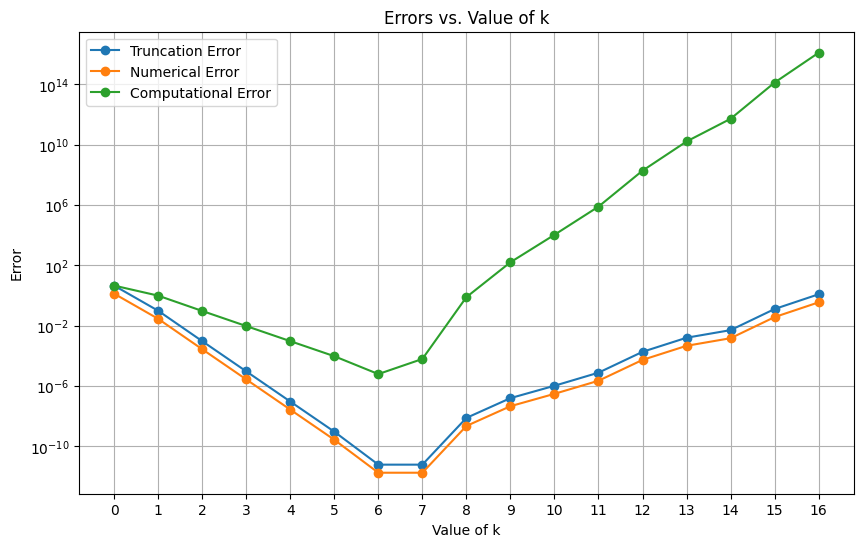

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, truncation_errors_2, label='Truncation Error', marker='o')
plt.plot(k_values, numerical_errors_2, label='Numerical Error', marker='o')
plt.plot(k_values, computational_errors_2, label='Computational Error', marker='o')

plt.yscale('log')
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.title('Errors vs. Value of k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [70]:
df = pd.DataFrame()
df["h_values"] = h_values
df["absolute_errors"] = truncation_errors_2
df["numerical_errors"] = numerical_errors_2
df["computational_errors"] = computational_errors_2
df = df.rename_axis("k", axis="columns")
df

k,h_values,absolute_errors,numerical_errors,computational_errors
0,1.000000e+00,4.518039e+00,1.318936e+00,4.518039e+00
1,1.000000e-01,9.748838e-02,2.845945e-02,9.748838e-01
2,1.000000e-02,9.453393e-04,2.759697e-04,9.453393e-02
3,1.000000e-03,9.450529e-06,2.758861e-06,9.450529e-03
4,1.000000e-04,9.450397e-08,2.758822e-08,9.450397e-04
5,1.000000e-05,9.499130e-10,2.773049e-10,9.499130e-05
6,1.000000e-06,6.223910e-12,1.816925e-12,6.223910e-06
7,1.000000e-07,6.223910e-12,1.816925e-12,6.223910e-05
8,1.000000e-08,7.765337e-09,2.266908e-09,7.765337e-01
9,1.000000e-09,1.587681e-07,4.634863e-08,1.587681e+02


In [71]:
def third_derivative_tan(x):
    return 6 * math.tan(x) * (1 + math.tan(x) ** 2) ** 2

In [72]:
macheps = 2**-52
M = abs(third_derivative_tan(x))
h_min_formula = (3 * macheps / M) ** (1/3)

In [74]:
computational_errors_min = min(computational_errors_2)
index_min = computational_errors_2.index(computational_errors_min)
h_min_graph = h_values[index_min]

print("Wartość h_min obliczona ze wzoru:", h_min_formula)
print("Wartość h_min odczytana z wykresu:", h_min_graph)

Wartość h_min obliczona ze wzoru: 1.8246730729023089e-06
Wartość h_min odczytana z wykresu: 1e-06
